In [1]:
from google.colab import files
uploaded = files.upload()

Saving spam.csv to spam.csv


In [2]:
import pandas as pd

In [4]:
# load dataset
df = pd.read_csv("spam.csv", encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

In [7]:
# Drop unnamed columns
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
# Check for null values
null_counts = df.isnull().sum()
print("Null value counts:\n", null_counts)

Null value counts:
 v1    0
v2    0
dtype: int64


In [10]:
## Get the Independent Features
X=df.drop('v1',axis=1)

In [78]:
## Get the Dependent features
# Convert 'ham' and 'spam' in y_train and y_test to 0 and 1 respectively
y = pd.factorize(df['v1'])[0]

In [12]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
X.shape

(5572, 1)

In [79]:
y.shape

(5572,)

In [24]:
import tensorflow as tf

In [25]:
tf.__version__

'2.18.0'

In [64]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import pad_sequences

In [29]:
messages=X.copy()

In [40]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [42]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [39]:
### Dataset Preprocessing - stemming
# from nltk.stem.porter import PorterStemmer ##stemming purpose
# ps = PorterStemmer()
# corpus = []
# for i in range(0, len(messages)):
#     mail = re.sub('[^a-zA-Z]', ' ', messages['v2'][i])
#     mail = mail.lower()
#     mail = mail.split()

#     mail = [ps.stem(word) for word in mail if not word in stopwords.words('english')]
#     mail = ' '.join(mail)
#     corpus.append(mail)

In [43]:
### Dataset Preprocessing
lemmatizer = WordNetLemmatizer()
corpus = []
for i in range(0, len(messages)):
    mail = re.sub('[^a-zA-Z]', ' ', messages['v2'][i])
    mail = mail.lower()
    mail = mail.split()

    mail = [lemmatizer.lemmatize(word) for word in mail if not word in stopwords.words('english')]
    mail = ' '.join(mail)
    corpus.append(mail)

In [45]:
corpus

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think go usf life around though',
 'freemsg hey darling week word back like fun still tb ok xxx std chgs send rcv',
 'even brother like speak treat like aid patent',
 'per request melle melle oru minnaminunginte nurungu vettam set callertune caller press copy friend callertune',
 'winner valued network customer selected receivea prize reward claim call claim code kl valid hour',
 'mobile month u r entitled update latest colour mobile camera free call mobile update co free',
 'gonna home soon want talk stuff anymore tonight k cried enough today',
 'six chance win cash pound txt csh send cost p day day tsandcs apply reply hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw'

# **One Hot Representation**

In [28]:
### Vocabulary size
voc_size=5000

In [46]:
onehot_repr=[one_hot(words,voc_size)for words in corpus]
onehot_repr

[[3,
  1600,
  704,
  495,
  4377,
  474,
  3146,
  1689,
  2841,
  1813,
  3936,
  121,
  3339,
  448,
  2849,
  2351],
 [1503, 882, 1127, 3366, 1380, 2185],
 [2328,
  3249,
  1444,
  3447,
  1876,
  4332,
  161,
  852,
  1025,
  2889,
  2186,
  455,
  4332,
  1894,
  3249,
  3349,
  1919,
  3576,
  3524,
  3390,
  1221],
 [1380, 1148, 3431, 89, 3338, 1380, 3390, 2319, 3431],
 [3820, 4948, 3, 1457, 3501, 764, 317],
 [1577,
  2488,
  3327,
  4192,
  174,
  3126,
  3663,
  1647,
  4311,
  3076,
  1503,
  3590,
  1919,
  3109,
  3317,
  151],
 [3979, 1849, 3663, 4751, 4717, 3663, 107, 217],
 [2798,
  3005,
  3179,
  3179,
  2878,
  4337,
  1547,
  496,
  2038,
  3313,
  571,
  699,
  4466,
  3000,
  3313],
 [4598,
  2418,
  282,
  3064,
  4407,
  3621,
  3944,
  621,
  1353,
  2206,
  1353,
  4672,
  2425,
  4504,
  2777],
 [123,
  1778,
  1380,
  1107,
  4720,
  2624,
  369,
  1736,
  123,
  1391,
  2328,
  2206,
  123,
  2624,
  4906,
  2328],
 [1325, 787, 4792, 1930, 3730, 4209, 3982,

In [49]:
corpus[1]

'ok lar joking wif u oni'

In [48]:
onehot_repr[1]

[1503, 882, 1127, 3366, 1380, 2185]

# **Embedding**

In [50]:
# Find the maximum length of a message in the corpus
max_length = 0
for message in corpus:
    if len(message) > max_length:
        max_length = len(message)

print(f"The maximum length of a message in the corpus is: {max_length}")


The maximum length of a message in the corpus is: 442


In [65]:
sent_length=460
embedded_docs=pad_sequences(onehot_repr,padding='post',maxlen=sent_length)
print(embedded_docs)

[[   3 1600  704 ...    0    0    0]
 [1503  882 1127 ...    0    0    0]
 [2328 3249 1444 ...    0    0    0]
 ...
 [1399 2649 3389 ...    0    0    0]
 [4127 3187 1026 ...    0    0    0]
 [4237 4514 4312 ...    0    0    0]]


In [55]:
embedded_docs[400]

array([2328, 2056,  455,  783, 3973,  455, 2044, 4514, 4201, 1384, 2889,
       2328, 4201, 1804,  516, 3936, 3595, 3576, 1152,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [71]:
## Creating model
sent_length=460
voc_size=5000
embedding_vector_features=40 ##features representation
model=Sequential()
model.add(Embedding(input_dim=voc_size, output_dim=embedding_vector_features,input_length=sent_length))
model.add(LSTM(100))
model.add(Dense(1,activation='sigmoid'))
model.build(input_shape=(None, sent_length))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)              │ (None, 460, 40)             │         200,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 100)                 │          56,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 256,501 (1001.96 KB)

 Trainable params: 256,501 (1001.96 KB)

 Non-trainable params: 0 (0.00 B)

None


**Embedding Layer (embedding)**
embedding (Embedding)        (None, 460, 40)           200000
Interpretation:

The Embedding layer converts input words (encoded as integers) into dense 40-dimensional vectors.
None means that the batch size is flexible.
Input:
(batch_size, 460) → Each input sample has 460 words.
Output:
(batch_size, 460, 40) → Each word is mapped to a 40-dimensional vector.
🔢 Parameter Calculation:
Param # = voc_size * embedding_vector_features
        = 5000 * 40
        = 200,000
Every word in the vocabulary gets a 40-dimensional trainable embedding.

**LSTM Layer (lstm)**
lstm (LSTM)                 (None, 100)               56400
Interpretation:

The LSTM layer processes the sequence and outputs a 100-dimensional hidden state.
Input Shape:
(batch_size, 460, 40) (sequence of 460 words, each represented by 40 features)
Output Shape:
(batch_size, 100) → After processing, it returns a 100-dimensional output vector.
🔢 Parameter Calculation: For an LSTM layer with 100 units and input dimension 40, the number of parameters is:

Param # = 4 * (units * (units + input_dim + 1))
        = 4 * (100 * (100 + 40 + 1))
        = 4 * (100 * 141)
        = 56,400
Why 4x? Each LSTM unit has:

Input Weights
Recurrent Weights
Bias Terms
Cell State

**Dense Layer**
This is the final output layer with a single neuron (for binary classification).
Activation Function: sigmoid → Outputs a probability between 0 and 1.
Input Shape: (batch_size, 100) (output from LSTM)
Output Shape: (batch_size, 1) → A single probability score per input.
🔢 Parameter Calculation:
Param # = (input_units * output_units) + bias
        = (100 * 1) + 1
        = 100 + 1
        = 101
So, it learns 101 trainable parameters.

**The Embedding layer learns word **representations, reducing the need for manual feature engineering.
**The LSTM layer** captures sequential dependencies (context from previous words).
**The Dense layer** produces the final probability score for classification.

In [80]:
import numpy as np
X_final=np.array(embedded_docs)
y_final=np.array(y)

In [81]:
X_final.shape,y_final.shape

((5572, 460), (5572,))

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)

In [83]:
### Finally Training
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 44s 729ms/step - accuracy: 0.8480 - loss: 0.4065 - val_accuracy: 0.9543 - val_loss: 0.1547
Epoch 2/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 78s 663ms/step - accuracy: 0.9791 - loss: 0.0835 - val_accuracy: 0.9821 - val_loss: 0.0696
Epoch 3/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 44s 723ms/step - accuracy: 0.9902 - loss: 0.0366 - val_accuracy: 0.9815 - val_loss: 0.0676
Epoch 4/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 82s 726ms/step - accuracy: 0.9935 - loss: 0.0211 - val_accuracy: 0.9826 - val_loss: 0.0696
Epoch 5/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 83s 739ms/step - accuracy: 0.9967 - loss: 0.0100 - val_accuracy: 0.9788 - val_loss: 0.0759
Epoch 6/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 77s 663ms/step - accuracy: 0.9993 - loss: 0.0044 - val_accuracy: 0.9690 - val_loss: 0.1139
Epoch 7/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 44s 747ms/step - accuracy: 0.9995 - loss: 0.0071 - val_accuracy: 0.9837 - val_loss: 0.0718
Epoch 8/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 82s 751ms/step - accuracy: 0.9994 - loss: 0.0028 - val_accu

In [84]:
# from tensorflow.keras.callbacks import EarlyStopping

# # Define EarlyStopping
# early_stopping = EarlyStopping(
#     monitor='val_loss',  # Stop when validation loss stops improving
#     patience=3,          # Number of epochs to wait before stopping (to allow minor fluctuations)
#     restore_best_weights=True  # Restore the best model weights
# )

# # Train the model with Early Stopping
# history = model.fit(
#     X_train, y_train,
#     validation_data=(X_test, y_test),
#     epochs=10,
#     batch_size=64,
#     callbacks=[early_stopping]  # Include EarlyStopping
# )


Epoch 1/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 45s 756ms/step - accuracy: 0.9980 - loss: 0.0047 - val_accuracy: 0.9853 - val_loss: 0.0770
Epoch 2/10


KeyboardInterrupt: 

In [85]:
y_pred=model.predict(X_test)

58/58 ━━━━━━━━━━━━━━━━━━━━ 6s 94ms/step


In [86]:
y_pred=np.where(y_pred > 0.6, 1,0) ##AUC ROC Curve

In [87]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[1582,    5],
       [  20,  232]])

In [88]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9864056552474171

In [89]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1587
           1       0.98      0.92      0.95       252

    accuracy                           0.99      1839
   macro avg       0.98      0.96      0.97      1839
weighted avg       0.99      0.99      0.99      1839



58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 123ms/step


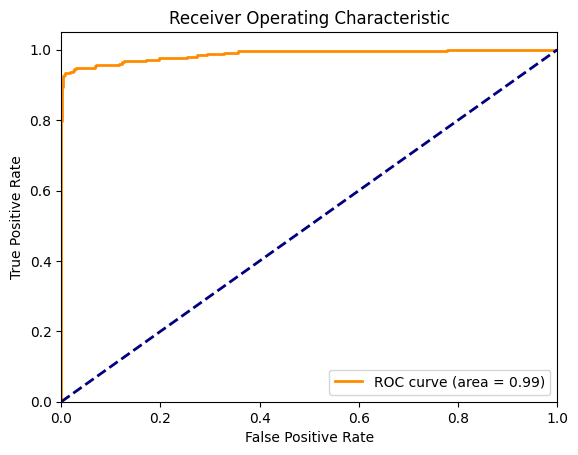

In [90]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming y_pred contains probabilities
y_pred_prob = model.predict(X_test)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
